In [1]:
import numpy as np
import loompy
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os

In [4]:
ds_single_cells = loompy.connect("dev_all.loom", validate = False)
ds_single_cells

,,,,,,,,,,,,Age,e7.0,e7.0,e7.0,e7.0,e7.0,e7.0,e7.0,e7.0,e8.0,e7.0,...
,,,,,,,,,,,,BTSNE,[-31.85552615 -61.93306125],[ -2.87413797 -57.27298664],[ -2.77695001 -56.40269395],[-27.60967517 -38.25846626],[ -9.55072307 -39.07598744],[-32.11604733 -62.34137016],[-30.93707251 -57.51320106],[ -3.34237798 -56.85237163],[-56.05262281 -29.958472 ],[ -2.96161651 -57.16943392],...
,,,,,,,,,,,,CellCycle,0.0045682960255824575,0.01088139281828074,0.011940902651285164,0.010640900195694716,0.009254807692307692,0.008029569207239358,0.009945962878847208,0.008352823254259938,0.009412528399870172,0.008047585724282717,...
,,,,,,,,,,,,CellID,10X39_2_A_1:AAACTTGAGAGCAGx,10X39_3_A_1:AAGTTCCTAGCCTAx,10X39_2_A_1:GGGACCACAGCGTTx,10X39_2_A_1:CAGCAATGGGTAGGx,10X39_3_A_1:CAGCCTACAGAGATx,10X39_3_A_1:TGATACCTAGGGTGx,10X39_2_A_1:TGAAATTGTGTCCCx,10X39_3_A_1:TAGAATACCTACGAx,10X21_2_A_1:AAAGTTTGACTGTGx,10X39_2_A_1:TGGAGACTAACTGCx,...
,,,,,,,,,,,,Cell_Conc,500,500,500,500,500,500,500,500,600,500,...
,,,,,,,,,,,,Chemistry,v2,v2,v2,v2,v2,v2,v2,v2,v2,v2,...
,,,,,,,,,,,,ChipID,10X39,10X39,10X39,10X39,10X39,10X39,10X39,10X39,10X21,10X39,...
,,,,,,,,,,,,Class,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,...
,,,,,,,,,,,,ClusterName,ParEndo,ParEndo,ParEndo,ParEndo,ParEndo,ParEndo,ParEndo,ParEndo,ParEndo,ParEndo,...
,,,,,,,,,,,,Clusters,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Date_Captured,2016-09-30,2016-09-30,2016-09-30,2016-09-30,2016-09-30,2016-09-30,2016-09-30,2016-09-30,2016-09-09,2016-09-30,...


In [5]:
CountData_sc = pd.DataFrame(data = ds_single_cells[:,:], index = ds_single_cells.ra.Gene, columns=ds_single_cells.ca.ClusterName)

In [6]:
stxbp1_counts_per_cell = CountData_sc.T["Stxbp1"]
aqp8_counts_per_cell = CountData_sc.T["Aqp8"]

In [147]:
dyrk1a_counts_per_cell = CountData_sc.T["Dyrk1a"]

In [149]:
np.sum(dyrk1a_counts_per_cell)

47844.0

In [8]:
stxbp1_per_ParEndo = stxbp1_counts_per_cell["ParEndo"]
aqp8_per_ParEndo =  aqp8_counts_per_cell["ParEndo"]

In [9]:
np.sum(aqp8_per_ParEndo)/11

1.8181818181818181

In [12]:
ds_dev = loompy.connect("dev_all.agg.loom", validate = False)
ds_dev

,,,,,,,,,,,,Age_e10_0,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e11_0,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e12_0,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e12_5,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e13_0,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e13_5,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e14_0,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e14_5,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e15_0,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e15_5,0,0,0,0,0,0,0,0,0,0,...
,,,,,,,,,,,,Age_e16_0,0,0,0,0,0,0,0,0,0,0,...


In [13]:
ages = ds_dev.ca.keys()[0:20]
ages = ages[-4:] +  ages[:-4] # right order
CountData = pd.DataFrame(data = ds_dev[:,:], index = ds_dev.ra.Gene, columns=ds_dev.ca.ClusterName)
metadata = {}
for i in ages:
    new = {i : ds_dev.ca[i]}
    metadata.update(new)
metadata = pd.DataFrame(metadata, index = ds_dev.ca.ClusterName).T
classes = pd.DataFrame(ds_dev.ca.Class, index = ds_dev.ca.ClusterName).T
classes_unique = classes.T[0].unique()

In [14]:
stxbp1_counts_per_cluster = CountData.T["Stxbp1"]
aqp8_counts_per_cluster = CountData.T["Aqp8"]

In [15]:
total_total_number_of_counts = np.sum(stxbp1_counts_per_cluster)

In [16]:
stxbp1_counts_per_cluster

ParEndo     0.090909
nan         0.000000
TrophEct    0.025114
FGut4       0.020408
FGut1       0.000000
              ...   
Neur793     0.293706
Neur794     0.523810
Neur795     0.245614
Neur796     0.655172
Neur797     0.416667
Name: Stxbp1, Length: 798, dtype: float64

In [ ]:
aqp8_counts_per_cluster.head()

In [28]:
df = metadata.append(CountData)
df_small = metadata.append(stxbp1_counts_per_cluster)
df_small = df_small.append(classes)
df_small = df_small.T

In [150]:
classes

,ParEndo,nan,TrophEct,FGut4,FGut1,FGut3,FGut2,VEnd1,VEnd3,VEnd2,...,Neur788,Neur789,Neur790,Neur791,Neur792,Neur793,Neur794,Neur795,Neur796,Neur797
0,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,Gastrulation,...,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron,Neuron


In [38]:
counts_per_age_vector = np.zeros(len(ages))
counts_per_cluster_per_age = np.zeros([len(ages),df_small.shape[0]])
j = 0
for i in ages:
    for k in range(df_small.shape[0]):
        counts_per_cluster_per_age[j,k] = df_small[i][k]*df_small["Stxbp1"][k]
        counts_per_age_vector[j] += counts_per_cluster_per_age[j,k] 
    j+= 1

# Get Counts per Class per Age 

In [29]:
counts_per_class_per_age = np.zeros([classes_unique.shape[0],len(ages)])
counts_per_class_per_age = pd.DataFrame(counts_per_class_per_age, index = classes_unique, columns = ages).T

j = 0
for i in ages:
    for k in range(df_small.shape[0]):
        current_class = classes.T[0][k]
        counts_per_class_per_age[current_class][j] += df_small[i][k]*df_small["Stxbp1"][k]
    j+= 1

In [135]:
counts_per_class_per_age

,Gastrulation,Radial glia,Mesenchyme,Neural tube,Mesoderm,Neural crest,Bad cells,Endoderm,Ectoderm,Blood,...,Choroid plexus,Ependymal,Pineal gland,Subcommissural organ,Olfactory ensheathing cell,Schwann cell,Oligodendrocyte,Neuroblast,Undefined,Neuron
Age_e7_0,496.836378,0.100604,0.088729,0.325112,0.947373,0.000000,0.071522,0.299107,0.173593,1.579847,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age_e8_0,59.211207,12.198076,11.665957,286.025668,79.389134,55.753663,9.423270,7.734017,15.352892,4.091758,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.874442,0.000000,0.000000
Age_e8_5,4.216791,26.347285,27.589306,41.718828,59.181616,78.529691,10.841760,0.327491,2.114473,1.688706,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.570599,0.000000,0.000000
Age_e9_0,1.254664,639.311877,341.547636,60.179862,10.622369,37.946269,46.445336,0.540289,21.852432,6.619810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,643.117360,8.301775,4.930411
Age_e10_0,0.700996,1013.044431,552.165124,65.938998,4.997423,35.215188,112.401166,0.099096,26.228474,19.764341,...,1.612903,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1584.710847,14.153846,135.527282
Age_e11_0,0.569451,391.890750,48.427860,0.240462,0.862085,1.067194,4.948978,0.000000,0.310995,21.595093,...,1.917155,0.000000,0.788618,0.379310,0.000000,0.597822,0.000000,1815.411278,0.136095,2240.368219
Age_e12_0,0.000000,508.855304,18.790060,0.112710,0.000000,0.237154,0.868574,0.000000,0.863554,25.855168,...,5.565822,0.324786,1.577236,0.379310,0.441176,0.921503,0.587283,1844.453965,0.408284,5703.497571
Age_e12_5,0.072581,110.386911,1.239123,0.338129,0.000000,0.000000,0.612460,0.000000,0.000000,3.737386,...,1.050999,0.000000,0.000000,0.000000,0.000000,0.156925,0.000000,460.699495,0.000000,847.026798
Age_e13_0,0.000000,43.935753,0.127981,0.000000,0.000000,0.132265,0.087494,0.000000,0.000000,2.940064,...,0.201613,0.000000,0.000000,0.000000,0.704266,1.190728,1.471146,660.706625,0.000000,3567.106670
Age_e13_5,0.072581,203.329818,1.217161,0.120231,0.000000,0.000000,0.777705,0.000000,0.012676,11.259028,...,0.974260,0.672414,1.276423,1.517241,0.220588,2.299255,4.554483,1128.873655,0.000000,4540.553646


In [146]:
np.sum(counts_per_class_per_age.loc["Age_e12_0",:])

8385.254324642907

In [31]:
number_of_cells_per_cluster = np.zeros(df_small.shape[0])
for i in range(df_small.shape[0]):
    for k in ages: 
        number_of_cells_per_cluster[i] += df_small[k][i]

In [32]:
number_of_cells_per_cluster 
number_of_cells_total = np.sum(number_of_cells_per_cluster)

In [83]:
ages_number = [7,8, 8.5 ,9,10,11,12, 12.5 ,13, 13.5, 14, 14.5, 15, 15.5 ,16, 16.25, 16.5, 17, 17.5, 18]

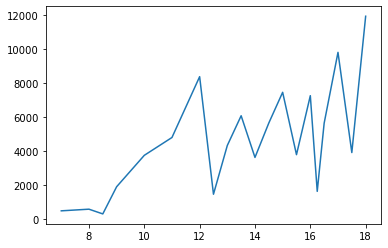

In [39]:
fig = plt.figure()
ax = plt.axes()
ax.plot(ages_number, counts_per_age_vector)

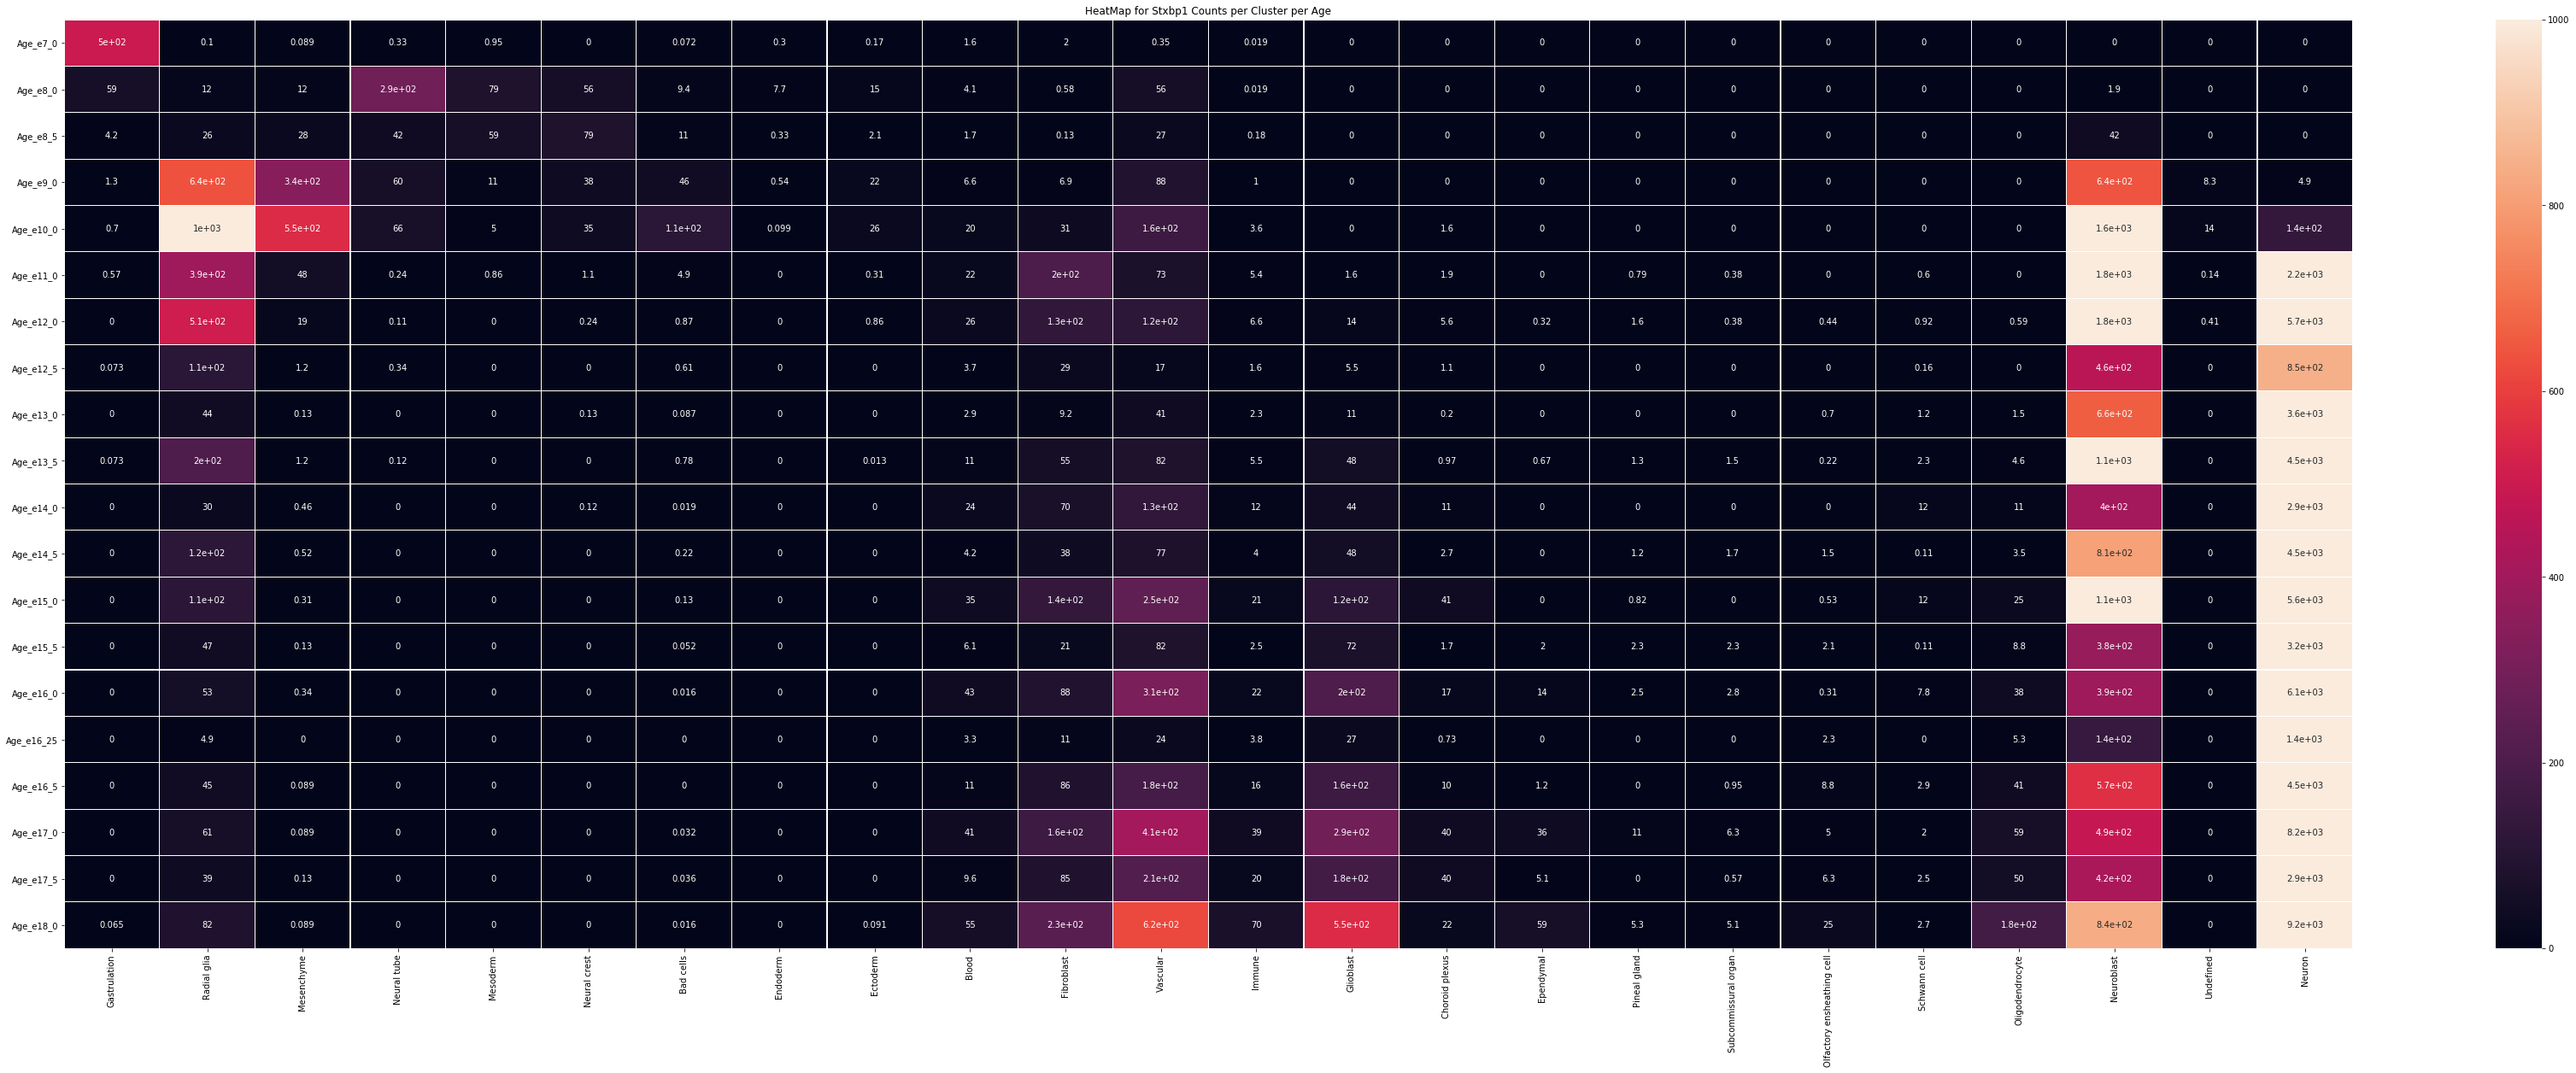

In [35]:
plt.figure(figsize=(60,20))
heat_map = sns.heatmap(counts_per_class_per_age, linewidth = 0.1 , annot = True, vmax = 1000)
plt.title( "HeatMap for Stxbp1 Counts per Cluster per Age" )
plt.show()

In [110]:
counts_per_cluster_per_age.max()

701.4462081128747

# Get Ages of Cells as Index and plot Stxbp1 Counts per Age again based on SC Data

In [18]:
CountData_sc_ages = pd.DataFrame(data = ds_single_cells[:,:], index = ds_single_cells.ra.Gene, columns=ds_single_cells.ca.Age)

In [122]:
CountData_sc_ages_Stxbp1 = CountData_sc_ages.T.Stxbp1
counts_per_age_vector_sc = np.zeros(len(ages))
j = 0 
ages_modified = [f[4:] for f in ages]
ages_modified = [f.replace("_",".") for f in ages_modified]
for i in ages_modified: 
    counts_per_age_vector_sc[j] = np.sum(CountData_sc_ages_Stxbp1[i])
    j += 1
counts_per_age_vector_sc = pd.DataFrame(counts_per_age_vector_sc, index = ages_modified, columns = ["Total Counts of Stxbp1"])
age_df = pd.DataFrame(ages_number, index=ages_modified, columns=["Ages in Embryonic Days"])
counts_per_age_vector_sc = pd.concat([counts_per_age_vector_sc, age_df], axis=1)

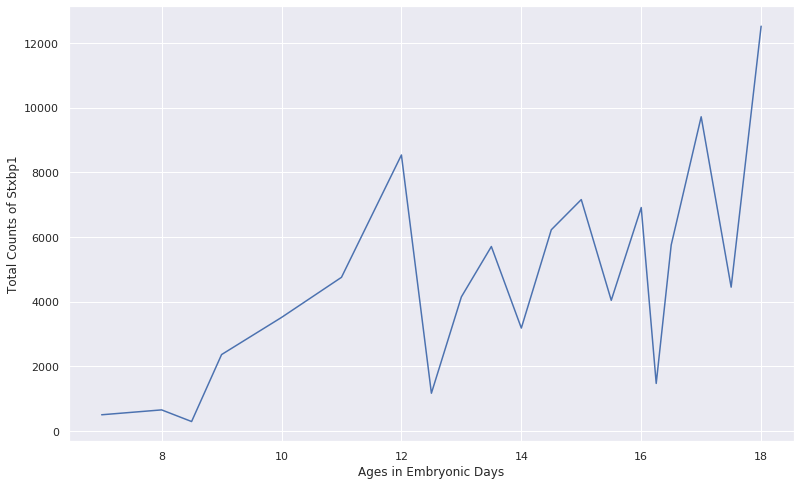

In [119]:
sns.set(font_scale = 1, rc={"figure.figsize":(13, 8)})
sns.lineplot(data=counts_per_age_vector_sc, x = "Ages in Embryonic Days", y = "Total Counts of Stxbp1")

# Normalize per Age 

In [123]:
cells_per_age = np.zeros(len(ages)) 
counts_per_age_normalized  = np.zeros(len(ages)) 
j = 0 
for i in ages_modified:
    cells_per_age[j] = CountData_sc_ages_Stxbp1[i].shape[0]
    counts_per_age_normalized[j] = counts_per_age_vector_sc["Total Counts of Stxbp1"][j]/cells_per_age[j]
    j += 1
counts_per_age_normalized = pd.DataFrame(counts_per_age_normalized, index=ages_modified, columns=["Counts Normalized by Cells per Age"])
counts_per_age_vector_sc = pd.concat([counts_per_age_vector_sc, counts_per_age_normalized], axis=1)

In [124]:
counts_per_age_vector_sc.head()

,Total Counts of Stxbp1,Ages in Embryonic Days,Counts Normalized by Cells per Age
e7.0,502.0,7.0,0.038672
e8.0,653.0,8.0,0.085270
e8.5,293.0,8.5,0.086507
e9.0,2363.0,9.0,0.147937
e10.0,3511.0,10.0,0.116089


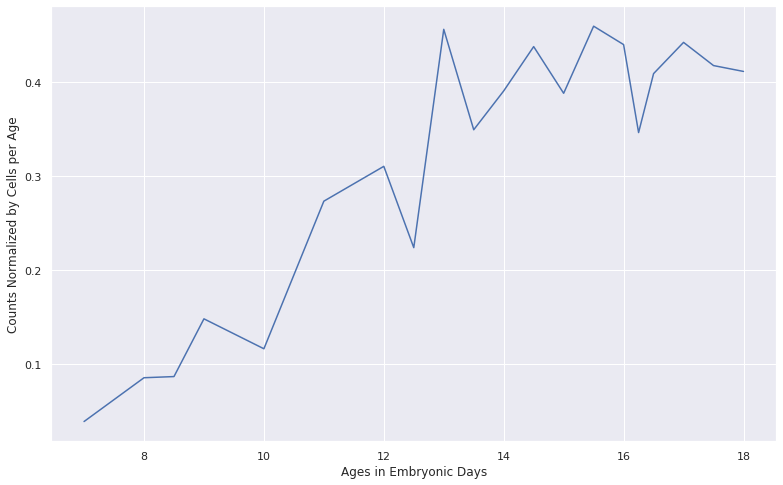

In [126]:
sns.set(font_scale = 1, rc={"figure.figsize":(13, 8)})
sns.lineplot(data=counts_per_age_vector_sc, x = "Ages in Embryonic Days", y = "Counts Normalized by Cells per Age")

In [115]:
counts_per_age_vector_sc["Total Counts of Stxbp1"][0]

502.0